2. Масив втрат APC: [18523. 18487. 18470. 18450. 18433. 18404. 18395. 18355. 18332. 18287.
 18254. 18229. 18199. 18175. 18111. 18072. 18053. 18002. 17969. 17939.
 17895. 17876. 17827. 17800. 17765. 17751. 17740. 17710. 17679. 17658.
 17627. 17596. 17579. 17547. 17503. 17476. 17438. 17396. 17344. 17304.
 17292. 17252. 17222. 17170. 17132. 17093. 17080. 17077. 17071. 17063.
 17043. 17003. 16955. 16938. 16925. 16906. 16897. 16878. 16878. 16869.
 16848. 16821. 16786. 16760. 16736. 16722. 16699. 16681. 16667. 16648.
 16631. 16620. 16599. 16567. 16542. 16521. 16495. 16480. 16473. 16461.
 16426. 16402. 16385. 16368. 16363. 16350. 16341. 16332. 16323. 16294.
 16286. 16255. 16238. 16211. 16203. 16161. 16141. 16103. 16095. 16074.
 16050. 16039. 16013. 16000. 15980. 15963. 15917. 15902. 15883. 15871.
 15862. 15826. 15811. 15779. 15755. 15732. 15715. 15704. 15685. 15645.
 15629. 15611. 15600. 15583. 15566. 15550. 15524. 15505. 15480. 15459.
 15450. 15431. 15413. 15398. 15383. 15372. 15337. 15319. 

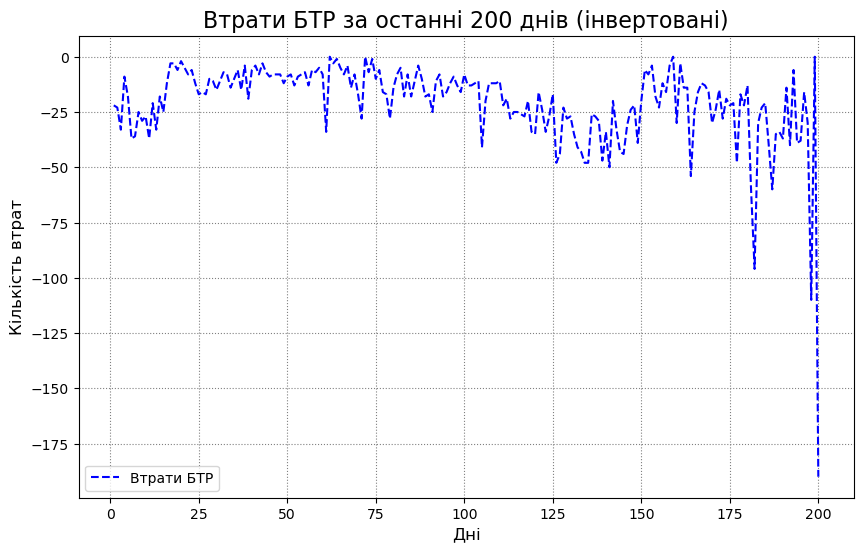

In [40]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def get_column_data(filename, column_name):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        headers = next(reader)
        col_index = headers.index(column_name)
        data = []
        for row in reader:
            try:
                data.append(float(row[col_index]))
            except ValueError:  
                data.append(np.nan)  
    return np.array(data)


apc_losses = get_column_data(r'C:\Users\yaros\Desktop\Labs Python\russia_losses_equipment.csv', 'APC')
print("2. Масив втрат APC:", apc_losses)


def get_dates(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader) 
        dates = [row[0] for row in reader] 
    return np.array(dates)

dates = get_dates(r'C:\Users\yaros\Desktop\Labs Python\russia_losses_equipment.csv')


def daily_losses(data):
    return np.diff(data)

daily_apc_losses = daily_losses(apc_losses)
print("3. Добові втрати БТР:", daily_apc_losses)


def top_losses(data, n=5):
    return np.sort(data)[:n] 

top_5_losses = top_losses(daily_apc_losses)
print("4. Топ 5 найбільших добових втрат БТР:", top_5_losses)


def last_day_summer_loss(data, dates):
    last_summer_day = '2023-08-31'
    index = np.where(dates == last_summer_day)[0][0]
    return data[index]

summer_last_day_loss = last_day_summer_loss(apc_losses, dates)
print(f"Втрати БТР на останній день літа 2023 року: {summer_last_day_loss}")


def average_daily_losses(data, start_day, end_day):
    daily_losses_array = np.diff(data)[start_day-1:end_day-1]
    return np.mean(daily_losses_array)  

average_apc_losses = average_daily_losses(apc_losses, 100, 500)
print(f"Середні втрати БТР за дні з 100 по 500: {average_apc_losses}")


def plot_losses(data, days=200):
    daily_losses = np.diff(data)
    last_200_losses = daily_losses[-days:]
    plt.figure(figsize=(10, 6), dpi=100)


    plt.plot(range(1, days+1), last_200_losses, linestyle='--', color='blue', label='Втрати БТР')


    plt.title("Втрати БТР за останні 200 днів (інвертовані)", fontsize=16)
    plt.xlabel("Дні", fontsize=12)
    plt.ylabel("Кількість втрат", fontsize=12)
    plt.grid(True, which='both', linestyle=':', color='gray')
    plt.legend()
    plt.savefig("apc_losses_200_days_inverted.png")
    plt.show()

print("7. Графік втрат БТР за останні 200 днів:")
plot_losses(apc_losses, days=200)
